# SI 330: Homework 3 - To tokenize, or not to tokenize, that is the question: Natural language processing of Shakespearean text with NLTK


## Due: Friday, February 2, 2018,  11:59:00pm

### Submission instructions
After completing this homework, you will turn in three files via Canvas ->  Assignments -> Lab 3:
Your Notebook, named si330-hw3-YOUR_UNIQUE_NAME.ipynb and
the HTML file, named si330-hw3-YOUR_UNIQUE_NAME.html

### Name:  YOUR NAME GOES HERE
### Uniqname: YOUR UNIQNAME GOES HERE
### People you worked with: [if you didn't work with anyone else write "I worked by myself" here].

## Top-Level Goal
To use NLP techniques to determine which characters in Shakespeare's play "Hamlet" are most similar to each other, based on their spoken lines.

## Learning Objectives
After completing this Lab, you should know how to:
* use NLTK to normalize and tokenize text data
* calculate type-token ratios (TTR)
* use NLTK to extract n-grams
* calculate document similarity using cosines


### Note: Suggestions for going "Above and Beyond" 80% are highlighted throughout this notebook.

### Outline of Steps For Analysis
Here's an overview of the steps that you'll need to do to complete this lab.
1. Load the raw text
2. Iterate through the text, extracting the character and the lines that they say and tokenize the spoken lines.
3. Normalize the text
4. Remove stopwords
5. Calculate type-token ration for each character
6. (Only when repeating for bigrams and trigrams): Generate n-grams
7. Calculate cosine similarity between each character (we supply the functions to do this)
8. List the top 10 most similar characters, based on cosine similarity of the lines they say
9. Visualize the results (we supply the code)
10. Repeat steps 4 to 7 with bigrams (n-grams where n=2) and trigrams (n-grams where n=3)

Each of these steps is detailed below.

Before we start the analysis, let's load the libraries that we'll need.  You should recognize re, nltk, and defaultdict (from collections).  We're also going to peek into the future of this course and use some functionality from pandas (which some of you have already used) and we're going to do some plotting so we'll use matplotlib and Seaborn.  You'll learn more about those later in the course; for now, we're just going to give you code that uses those libraries.

**NOTE: If the next code cell fails because of missing libraries, install them like you installed nltk (look at the lab for instructions on how to do that)**

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from collections import defaultdict
%matplotlib inline

## Step 1: Load the text

Just like we did in the lab, we're going to load the text from one of NLTK's corpora (in this case, the tragic play "Hamlet") into a variable and print the first 500 or so characters.

**NOTE: If you print substantially more than 500 characters, make sure you clear your output before saving your
notebook.  Failing to do so may make your notebook unopenable in future sessions.**

In [2]:
raw_text = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

# Print the first 500 characters of the text.
print(raw_text[:500])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not


Next, we will retrieve the lines of a all the characters from the play and store in a dictionary.  You should store each sentence as a list. The value of your dictionary should be a list of lists for the character.

## Step 2: Split lines into character names and spoken lines and tokenize the spoken lines into 



We suggest you use a dictionary with the key being the character name and the value being a list of lists that correspond the sentences (the outer list) and the tokenized words (the inner lists)</font>
So you might get a dictionary with keys and values that look something like:

```
{'Bap': [['say', 'what', 'is', 'horatio', 'there'],
              ['welcome', 'horatio', 'welcome', 'good', 'marcellus'],
              ['i', 'haue', 'seene', 'nothing']]}
```
### <font color="magenta">Copy and modify the code you created in the lab to split the character name from their lines.</font>

## Rubric: 

### 13 points 
<font color="blue">If the data structure, character_lines, is completely correct. 5 points for getting the character names and removing duplicates (as long as there was a decent attempt to remove duplicates), 5 points for getting character lines, 3 points for tokenizing.</font>

### -2 points
<font color="blue">If the data structure, character_lines, is getting most of the lines of the characters. You may be getting some extra lines.</font>

### -2 points
<font color="blue">If the data structure character_lines was not created appropriately.</font>

### -3 points
<font color="blue">If the character names were not consolidated to remove any duplicates.</font>

### -5 points
<font color="blue">If your regex is not getting at least 50% of the character lines.</font>

In [3]:
from collections import defaultdict

In [4]:
# insert your code here
character_names = {
    'Barnardo': 'Barnardo', 
    'Fran': 'Francisco', 
    'Bar': 'Barnardo', 
    'Barn': 'Barnardo', 
    'Hor': 'Horatio', 
    'Mar': 'Marcellus', 
    'Fra': 'Francisco', 
    'Hora': 'Horatio', 
    'King': 'King', 
    'Volt': 'Voltimand', 
    'Laer': 'Laertes', 
    'Pol': 'Polonius', 
    'Ham': 'Hamlet', 
    'Queen': 'Queen', 
    'Qu': 'Queen', 
    'Both': None, 
    'All': None, 
    'Ophel': 'Ophelia', 
    'Ophe': 'Ophelia', 
    'Polon': 'Polonius', 
    'Horat': 'Horatio', 
    'Gho': 'Ghost', 
    'Ghost': 'Ghost', 
    'Marcell': 'Marcellus', 
    'Reynol': 'Reynaldo', 
    'Rosin': 'Rosencrantz', 
    'Guil': 'Guildenstern', 
    'Queene': 'Queen', 
    'Guild': 'Guildenstern', 
    'Ha': 'Hamlet', 
    'Play': 'First Player', 
    'Player': 'First Player', 
    'Exeunt': None, 
    'Bap': 'Baptista', 
    'Bapt': 'Baptista', 
    'Lucian': 'Lucianus', 
    'Ro': 'Rosencrantz', 
    'Hamlet': 'Hamlet', 
    'For': 'Fortinbras', 
    'Cap': 'Captain', 
    'Mes': 'Gentlemen', 
    'Al': None, 
    'La': 'Laertes', 
    'Ser': 'Servant', 
    'Say': 'First Sailor', 
    'Kin': 'King', 
    'Clown': 'Clown', 
    'Other': None, 
    'Clo': 'Clown', 
    'Priest': 'Priest', 
    'Gen': 'Gentlemen', 
    'Osr': 'Osric', 
    'Osricke': 'Osric', 
    'Fortin': 'Fortinbras', 
    'Amb': 'Ambassador'
}

In [6]:
# Solution
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\s{2,}([A-Z][a-z]+)\.(.*?)\n(?=\s)') # Fill in with the right regular expression.
line_tokenizer = RegexpTokenizer(r'\w+')

word_tokens = tokenizer.tokenize(raw_text)
character_lines = defaultdict(list)
for i in word_tokens:
    character_lines[character_names[i[0]]].append(line_tokenizer.tokenize(i[1].lower()))

print(character_lines)

defaultdict(<class 'list'>, {'Barnardo': [['who', 's', 'there'], ['long', 'liue', 'the', 'king'], ['he'], ['tis', 'now', 'strook', 'twelue', 'get', 'thee', 'to', 'bed', 'francisco'], ['haue', 'you', 'had', 'quiet', 'guard'], ['well', 'goodnight', 'if', 'you', 'do', 'meet', 'horatio', 'and', 'marcellus', 'the', 'riuals', 'of', 'my', 'watch', 'bid', 'them', 'make', 'hast', 'enter', 'horatio', 'and', 'marcellus'], ['say', 'what', 'is', 'horatio', 'there'], ['welcome', 'horatio', 'welcome', 'good', 'marcellus'], ['i', 'haue', 'seene', 'nothing'], ['sit', 'downe', 'a', 'while', 'and', 'let', 'vs', 'once', 'againe', 'assaile', 'your', 'eares', 'that', 'are', 'so', 'fortified', 'against', 'our', 'story', 'what', 'we', 'two', 'nights', 'haue', 'seene'], ['last', 'night', 'of', 'all', 'when', 'yond', 'same', 'starre', 'that', 's', 'westward', 'from', 'the', 'pole', 'had', 'made', 'his', 'course', 't', 'illume', 'that', 'part', 'of', 'heauen', 'where', 'now', 'it', 'burnes', 'marcellus', 'and', 

When you do this, you will notice that there seem to be a number of different abbreviations used for the same
characters.  For example, "Clown" is referred to as "Clo", "Clown" and "Clowne".  You should merge those multiple
abbreviations into the same character, using your best judgement about which ones are the same.  It would be best (**Above and Beyond**) to look up the actual list of characters (use Google) and map the abbreviations onto the
full names of the characters.  You should also use this opportunity to eliminate stage directions that managed
to slip through your regular expression and any other questionable lines.

One way to do this is to create a dictionary that maps abbreviations onto the canonical names and look up the values for each abbreviation.

### <font color="magenta">Write code to combine lines from different abbreviations of the same character name.</font>

In [6]:
# Done in the previous step

## Step 3: Normalize text
You know how to do this: use ```str.lower()```.
### <font color="magenta">Use str.lower() to normalize the spoken lines

## Rubric

### 2 points
<font color="blue">If tokens in character_lines are normalized. Note, people may do this in the previous step itself.</font>

In [7]:
# insert your code here
# Performed in the previous step

## Step 4: Remove stopwords

You used stopwords in an earlier assignment.
**NOTE: When you work with bigrams and trigrams (see step 10), you should remove bigrams that
contain stopwords.  For example ('a','zebra') would be removed because 'a' is in the stopword list**.


### <font color="magenta">Remove stopwords from your list of words.</font>

## Rubric
### 3 points
<font color="blue">If tokens in character_lines are have been filtered for english stopwords.
Note: the output datastructure may be different, but afaik this is the optimal way to do it because it simplifies the calculations for the subsequent steps.</font>

In [8]:
from nltk.corpus import stopwords
# insert your code here
stop_words = stopwords.words("english")

character_lines_filtered = defaultdict(list)
for k, v in character_lines.items():
    # Since in the next step we need the word counts anyway, 
    # and we don't need the filtered list of words subsequently
    # I've created them here to reduce the number of data structures.
    word_count = defaultdict(int) 
    for list_of_words in v:
        for word in list_of_words:
            if word not in stop_words:
                word_count[word] += 1
    character_lines_filtered[k] = word_count

## Step 5:  Calculate type-token ratios for each character

We would like to compare the Type-Token Ratio (TTR) for the different cast members.
### <font color="magenta">Use the dictionary created previously and calculate total number of word types, word tokens, and type-token ratio for each character.</font>

Print the results in a readable, attractive format.</font>

## Rubric

### 5 points
<font color="blue">If the calculation and all the steps are correct.</font>

### -2 points
<font color="blue">If the calculations are slightly off. i.e. there are small errors in the calculation of TTR such as incorrect token_count or incorrect fraction calculation.</font>


In [9]:
# insert your code here
for k, v in character_lines_filtered.items():
    token_count = 0
    for word, count in v.items():
        token_count += count
    # len(v) gives my the number of type
    print(k, len(v)/token_count)

Barnardo 0.8260869565217391
Francisco 0.9032258064516129
Horatio 0.6543778801843319
Marcellus 0.8208955223880597
King 0.5535273803650715
Voltimand 0.9625
Laertes 0.6805555555555556
Polonius 0.5781733746130031
Hamlet 0.4407125626275747
Queen 0.7030716723549488
None 0.8271604938271605
Ophelia 0.6739130434782609
Ghost 0.7512820512820513
Reynaldo 0.5
Rosencrantz 0.7899686520376176
Guildenstern 0.8333333333333334
First Player 0.9
Baptista 0.8476190476190476
Lucianus 0.9705882352941176
Fortinbras 0.8811881188118812
Captain 1.0
Gentlemen 0.8360655737704918
Servant 1.0
First Sailor 0.8888888888888888
Clown 0.6941176470588235
Priest 0.9583333333333334
Osric 0.7801418439716312
Ambassador 1.0


## Step 6: Generate n-grams (only when doing Step 10, see below)

The ```nltk.ngrams(words,n)``` function takes a list of words and a value of n, where n=2 for bigrams and n=3 for trigrams, and return a list of n-tuples.  You can use it to generate bigrams and trigrams.
### <font color="magenta">Use ```nltk.ngrams()``` to generate bigrams and trigrams as appropriate.

## Rubric

### 5 points
<font color="blue">If the bigrams are calculated correctly i.e. the steps involved in creating the bigrams, and the output data structure are correct.</font>

### -5 points
<font color="blue">If formula for calculating bigram counts has been implemented incorrectly.<font>

### -2 points
<font color="blue">If the there are small errors such as not removing stopwords or crossing sentence / stanza boundaries in the creation of bigrams.</font>

### -2 points
<font color="blue">If the output data structure wasn't created properly</font>

### -3 points
<font color="blue">If stop words were removed before creating bigrams - getting bigrams which doesn't exist</font>

In [20]:
# insert your code here
character_bigram_counts = defaultdict(list)
for k, v in character_lines.items():
    bigram_counts = defaultdict(int)
    for list_of_words in v:
        for bigram in list(nltk.bigrams(list_of_words)):
            if bigram[0] not in stop_words and bigram[1] not in stop_words:
                bigram_counts[bigram] += 1
    character_bigram_counts[k] = bigram_counts
    
# insert your code here
character_trigram_counts = defaultdict(list)
for k, v in character_lines.items():
    trigram_counts = defaultdict(int)
    for list_of_words in v:
        for trigram in list(nltk.trigrams(list_of_words)):
            if trigram[0] not in stop_words and trigram[1] not in stop_words:
                trigram_counts[trigram] += 1
    character_trigram_counts[k] = trigram_counts

## Step 7: Cosine similarity
We want to compare the similarity of two n-gram vectors.  A document is a collection of words so we can create a _vector_ of that document with as many dimensions as there are words, and a value (the word count) that represents the length of the vector on that axis.

Consider the following text:
>"This course is awesome."

We could create a vector representation of the normalized (i.e. lowercased) version of it:

|Word|Count|
|---|---|
|this | 1 | 
| course | 1 | 
| is | 1 |
| awesome | 1 |

Now let's take another text:

>"This course is a lot of work."

The vector representation of that (normalized) text would be:

| Word | Count | 
| --- | --- |
| this | 1 |
| course | 1 |
| is | 1 | 
| a | 1 |
| lot | 1 | 
| of | 1 |
| work | 1 |

If we "align" the two vectors, we get:

| Word | Count(D1) | Count(D2) |
| --- | --- | --- |
| this | 1 | 1 |
| course | 1 | 1 |
| is | 1 | 1 |
| awesome | 1 | 0 |
| a | 0 | 1 |
| lot | 0 | 1 | 
| of | 0 | 1 |
| work | 0 | 1 |

To calculate the cosine similarity, we take the dot product (also known as the inner product) of the two
vectors and "normalize" it to the length of the two vectors.

#### $cos(\theta)  = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|}$

Here D1.D2 is the inner product. Let's say we have two word_count dictionaries, D1 = {"and": 3,"of": 2,"the": 5} and D2 =  {"and": 4,"in": 1,"of": 1,"this": 2}. The inner product for D1 and D2 = 14.0 

#### $cos(\theta) = 1$ means that the two documents are identical
#### $cos(\theta) = 0$ means that the two documents have no words in common

We have created the function <b>```cosine_similarity```</b> for you which will calculate the similarity measure. You will need to pass two dictionaries into the function, where the key is the n-gram and the value is the count for the n-gram.

In [11]:
import math

def cosine_similarity(D1,D2):
    """
    The input is a list of (word,freq) pairs.
    Return the angle between these two vectors.
    """
    numerator = inner_product(D1,D2)
    denominator = math.sqrt(inner_product(D1,D1)*inner_product(D2,D2))
    return (numerator/denominator)

def inner_product(D1,D2):
    """
    Inner product between two vectors, where vectors
    are represented as dictionaries of (word,freq) pairs.
    Example: inner_product({"and":3,"of":2,"the":5},
                           {"and":4,"in":1,"of":1,"this":2}) = 14.0 
    """
    sum = 0.0
    for key in D1:
        if key in D2:
            sum += D1[key] * D2[key]
    return sum

Using the example from above:

In [12]:
d1 = {"this": 1, "course": 1, "is": 1, "awesome": 1, "a": 0, "lot": 0, "of": 0, "work": 0}
d2 = {"this": 1, "course": 1, "is": 1, "awesome": 0, "a": 1, "lot": 1, "of": 1, "work": 1}
cosine_similarity(d1,d2)

0.5669467095138409

If we have two vectors that point in the same direction but are different lengths, the
angle between them is 0 (i.e. they are identical):

In [13]:
d1 = {'a': 20, 'b': 30, 'c': 44}
d2 = {'a': 10, 'b': 15, 'c': 22}
cosine_similarity(d1,d2)

1.0

### <font color="magenta">Use the cosine_similarity function to generate a dictionary whose keys are 2-tuples of characters and values are the cosine similarity between them</font>
Elements should look something like:
```
(('King', 'Polonius'), 0.8332402081352969)
```

## Rubric

### 10 points
<font color="blue">If code for calculating cosine similarity has been implemented correctly including nested ```for loops``` for characters, and storing the similarities.</font>

### -2 points
<font color="blue">If the there are small mistakes in implementing the ```cosine_similarity``` function.</font>

### -3 points
<font color="blue">If not iterating correctly over the pair of characters i.e. not calculating for each pair of characters.</font>

In [14]:
# insert your code here
similarities = defaultdict(int)
for char1, lines_char_1 in character_lines_filtered.items():
    for char2, lines_char_2 in character_lines_filtered.items():
        if char1 != None and char2 != None and char1 != char2:
            key = char1, char2
            similarities[key] = cosine_similarity(lines_char_1, lines_char_2)

## Step 8: Print the top 10 most similar characters, based on cosine similarity of what they said

In [15]:
# insert your code here
sorted_similarities = sorted(similarities.items(), key = lambda x: x[1], reverse = True)
for i in sorted_similarities[:10]:
    print(i)

(('Reynaldo', 'Guildenstern'), 0.739438993994632)
(('Guildenstern', 'Reynaldo'), 0.739438993994632)
(('Horatio', 'Reynaldo'), 0.7243961072397178)
(('Reynaldo', 'Horatio'), 0.7243961072397178)
(('King', 'Hamlet'), 0.7070548603604834)
(('Hamlet', 'King'), 0.7070548603604834)
(('Reynaldo', 'Rosencrantz'), 0.6998282579707378)
(('Rosencrantz', 'Reynaldo'), 0.6998282579707378)
(('Ophelia', 'Reynaldo'), 0.6955024888729626)
(('Reynaldo', 'Ophelia'), 0.6955024888729626)


## Step 9: Visualize the similarity matrix
We're jumping ahead a bit in this step, but we're supplying the code for you.  Assuming your data is in the
format specified in Step 7 (above), you should be able to simply run the next code block to generate a 
heatmap of the correlation matrix.

## Rubric

### 2 points
<font color="blue">Correctly implementing the visualization.</font>

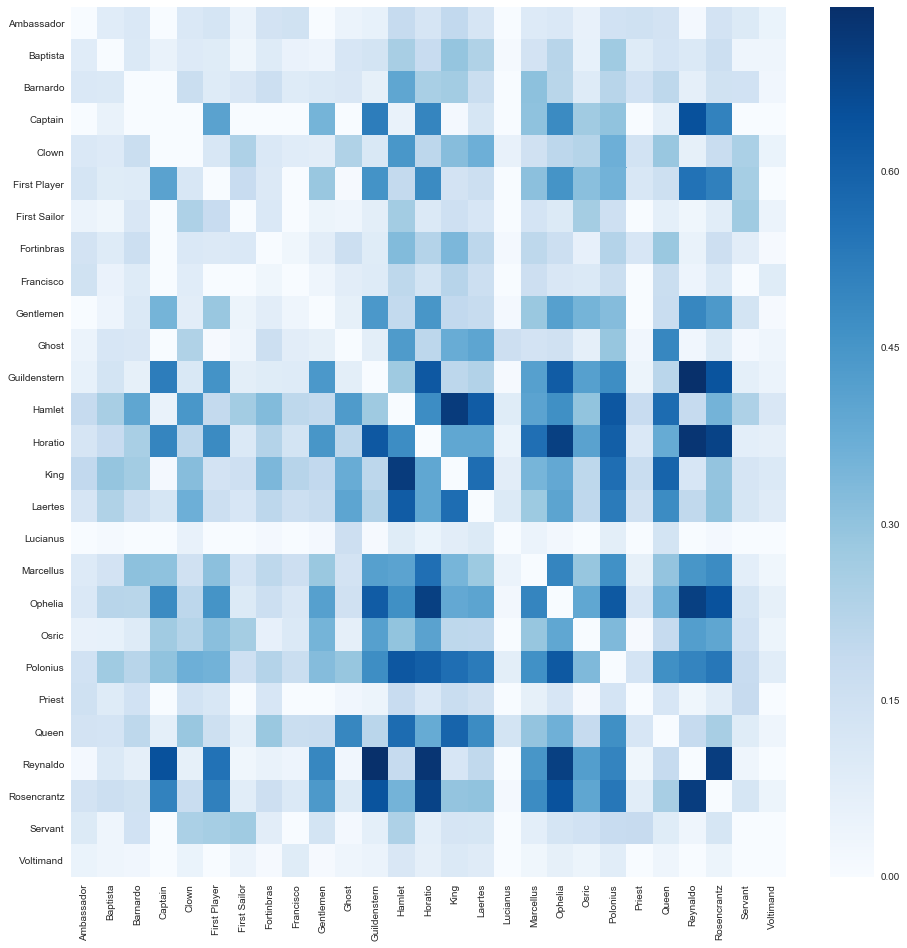

In [21]:
# You should not have to modify the following code
ser = pd.Series(list(similarities.values()),
                  index=pd.MultiIndex.from_tuples(similarities.keys()))
df = ser.unstack().fillna(0)
df.shape
sns.set(rc={"figure.figsize": (16, 16)})
sns.heatmap(df,cmap="Blues");

## Step 10: Repeat Steps 6-9 two more times, once using bigrams and once using trigrams (instead of single words)

**NOTE: You can copy the code and run it  or you can go _Above and Beyond_ and refactor your code above so that you create functions that take parameters (line the n for n-grams) and then call those functions**

## Rubric

### 5 points
<font color="blue">Bigrams - 5, Trigrams - 5</font>

In [27]:
# insert your code here
bigram_similarities = defaultdict(int)
for char1, lines_char_1 in character_bigram_counts.items():
    for char2, lines_char_2 in character_bigram_counts.items():
        if char1 != None and char2 != None and char1 != char2 and len(lines_char_1) != 0 and len(lines_char_2) != 0:
            key = char1, char2
            bigram_similarities[key] = cosine_similarity(lines_char_1, lines_char_2)
            
sorted_similarities = sorted(bigram_similarities.items(), key = lambda x: x[1], reverse = True)
for i in sorted_similarities:
    print(i)

(('Barnardo', 'Horatio'), 0.09856061060458624)
(('Horatio', 'Barnardo'), 0.09856061060458624)
(('Guildenstern', 'Ambassador'), 0.07808688094430304)
(('Ambassador', 'Guildenstern'), 0.07808688094430304)
(('Reynaldo', 'Osric'), 0.06933752452815364)
(('First Sailor', 'Osric'), 0.06933752452815364)
(('Osric', 'Reynaldo'), 0.06933752452815364)
(('Osric', 'First Sailor'), 0.06933752452815364)
(('Marcellus', 'Reynaldo'), 0.05976143046671968)
(('Reynaldo', 'Marcellus'), 0.05976143046671968)
(('Horatio', 'Reynaldo'), 0.053760333057047034)
(('Reynaldo', 'Horatio'), 0.053760333057047034)
(('Horatio', 'Hamlet'), 0.05207017133936836)
(('Hamlet', 'Horatio'), 0.05207017133936836)
(('Reynaldo', 'Rosencrantz'), 0.05076730825668096)
(('Rosencrantz', 'Reynaldo'), 0.05076730825668096)
(('King', 'Hamlet'), 0.04977328259006114)
(('Hamlet', 'King'), 0.04977328259006114)
(('Barnardo', 'Hamlet'), 0.047082834882490265)
(('Hamlet', 'Barnardo'), 0.047082834882490265)
(('Barnardo', 'Ophelia'), 0.04241898419838518)

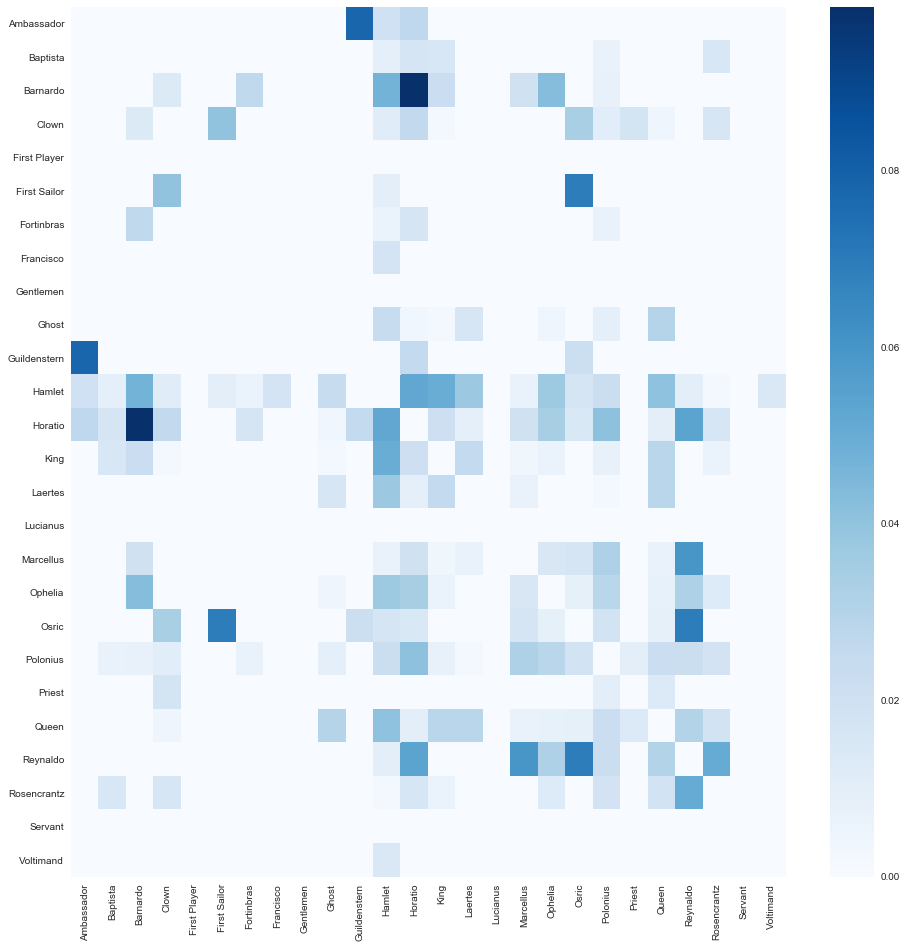

In [24]:
# You should not have to modify the following code
ser = pd.Series(list(bigram_similarities.values()),
                  index=pd.MultiIndex.from_tuples(bigram_similarities.keys()))
df = ser.unstack().fillna(0)
df.shape
sns.set(rc={"figure.figsize": (16, 16)})
sns.heatmap(df,cmap="Blues");

In [25]:
# insert your code here
trigram_similarities = defaultdict(int)
for char1, lines_char_1 in character_trigram_counts.items():
    for char2, lines_char_2 in character_trigram_counts.items():
        if char1 != None and char2 != None and char1 != char2 and len(lines_char_1) != 0 and len(lines_char_2) != 0:
            key = char1, char2
            trigram_similarities[key] = cosine_similarity(lines_char_1, lines_char_2)
            
sorted_trigram_similarities = sorted(trigram_similarities.items(), key = lambda x: x[1], reverse = True)
for i in sorted_trigram_similarities[:10]:
    print(i)

(('Barnardo', 'Clown'), 0.017541160386140585)
(('Clown', 'Barnardo'), 0.017541160386140585)
(('Barnardo', 'Horatio'), 0.011322770341445958)
(('Horatio', 'Barnardo'), 0.011322770341445958)
(('Hamlet', 'First Sailor'), 0.010981719669881535)
(('First Sailor', 'Hamlet'), 0.010981719669881535)
(('Hamlet', 'Osric'), 0.009933339190326167)
(('Osric', 'Hamlet'), 0.009933339190326167)
(('Horatio', 'Guildenstern'), 0.009183979479633063)
(('Guildenstern', 'Horatio'), 0.009183979479633063)


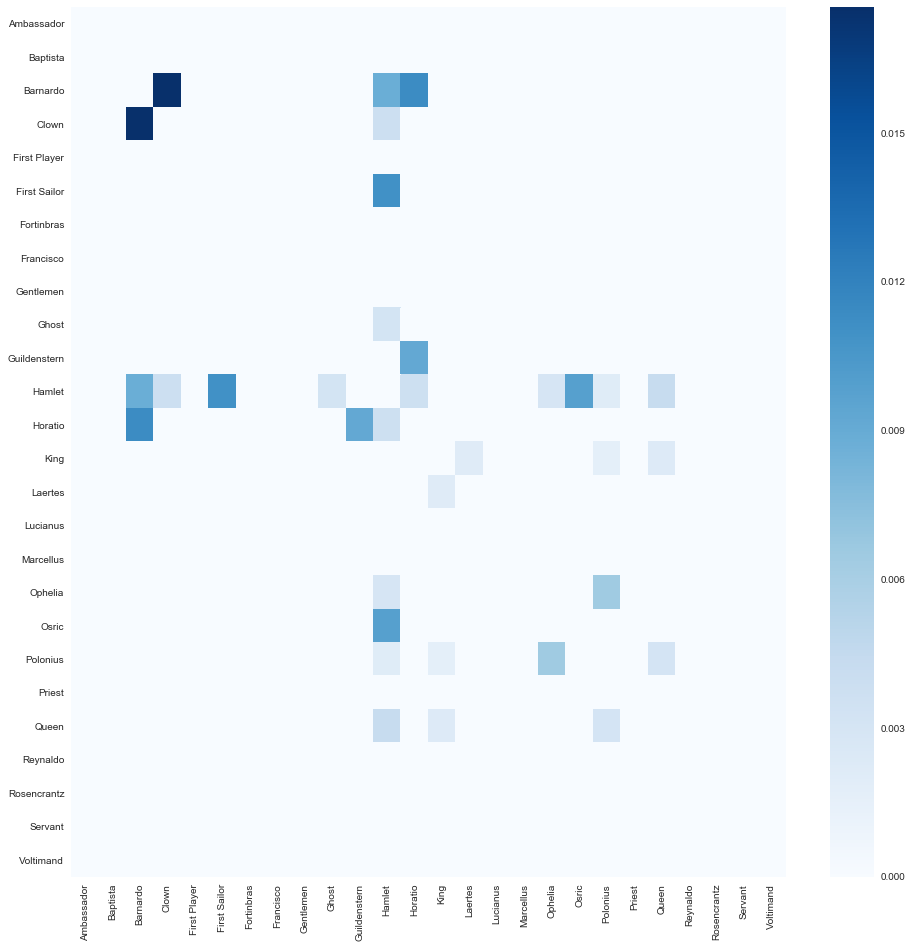

In [26]:
# You should not have to modify the following code
ser = pd.Series(list(trigram_similarities.values()),
                  index=pd.MultiIndex.from_tuples(trigram_similarities.keys()))
df = ser.unstack().fillna(0)
df.shape
sns.set(rc={"figure.figsize": (16, 16)})
sns.heatmap(df,cmap="Blues");

### Above and Beyond Possibility
You might want to consider running the above analyses on other Shakespearean tragedies and compare the results to these.